In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cd /content/drive/My Drive/ML

/content/drive/My Drive/ML


In [0]:
train_folder = "./train"
valib_folder = "./validation"

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
model = Sequential()

In [7]:
model.add(Conv2D(16, (3,3), activation="relu", input_shape = (200,200,3)))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(32, (3,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64, (3,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0

In [0]:
from tensorflow.keras.optimizers import RMSprop

In [0]:
model.compile(loss = "binary_crossentropy", optimizer=RMSprop(learning_rate = 0.001), metrics=["acc"])

In [0]:
train_gen = ImageDataGenerator(zoom_range=0.3, rescale=1/255)
valid_gen = ImageDataGenerator(zoom_range=0.3, rescale=1/225)

In [11]:
gen_training_data = train_gen.flow_from_directory(
    train_folder,
    target_size = (200, 200),
    batch_size = 128,
    class_mode = "binary"
)

Found 1027 images belonging to 2 classes.


In [12]:
gen_validation_data = valid_gen.flow_from_directory(
    valib_folder,
    target_size = (200, 200),
    batch_size = 128,
    class_mode = "binary"
)

Found 256 images belonging to 2 classes.


In [13]:
H = model.fit_generator(
    gen_training_data,
    steps_per_epoch = 10,
    epochs = 10,
    verbose = 1,
    validation_data = gen_validation_data,
    validation_steps = 10
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
10/10 [==============================] - 34s 3s/step - loss: 3.0738 - acc: 0.5316 - val_loss: 0.5525 - val_acc: 0.8102
Epoch 2/10
10/10 [==============================] - 36s 4s/step - loss: 0.6605 - acc: 0.7515 - val_loss: 0.4332 - val_acc: 0.8258
Epoch 3/10
10/10 [==============================] - 36s 4s/step - loss: 1.0269 - acc: 0.8372 - val_loss: 0.6562 - val_acc: 0.7797
Epoch 4/10
10/10 [==============================] - 36s 4s/step - loss: 0.2211 - acc: 0.9065 - val_loss: 1.6528 - val_acc: 0.6727
Epoch 5/10
10/10 [==============================] - 36s 4s/step - loss: 0.3635 - acc: 0.8580 - val_loss: 1.1987 - val_acc: 0.7758
Epoch 6/10
10/10 [==============================] - 36s 4s/step - loss: 0.1206 - acc: 0.9515 - val_loss: 1.5125 - val_acc: 0.7797
Epoch 7/10
10/10 [==============================] - 36s 4s/step - loss: 0.0728 - acc: 0.9688 - val_loss: 0.8039 - val_acc: 0.8594
Epoch 8/10
10/

In [0]:
model.save("classifiedHorseOrHuman.h5")

In [15]:
from google.colab import files
from keras.preprocessing import image

Using TensorFlow backend.


Saving hinh-anh-khong-the-khong-yeu-cua-be-gai-5-tuoi-giua-canh-dong-hoa-132831 (1).webp to hinh-anh-khong-the-khong-yeu-cua-be-gai-5-tuoi-giua-canh-dong-hoa-132831 (1).webp


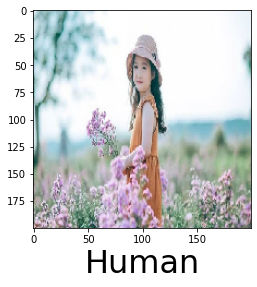

In [21]:
uploaded = files.upload()

for k in uploaded.keys():
    path = "./" + k
    img = image.load_img(path, target_size=(200,200))
    x = image.img_to_array(img) / 255
    x = np.expand_dims(x, axis = 0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    if classes[0] > 0.5:
        plt.imshow(img)
        plt.xlabel("Human", size = 32)
    else:
        plt.imshow(img)
        plt.xlabel("Horse", size = 32)